## Manual Time Series Implementation

In [360]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [362]:
#load dataset from cleaning notebook
df = pd.read_csv("household_power_cleaned.csv.zip", parse_dates=["Datetime"], index_col="Datetime")
#target variable
power_df = df["Global_active_power"].copy()
power_df.head()

Datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [363]:
#option1: hourly average power
hourly = power_df.resample("H").mean()
#option2: daily average power
daily = power_df.resample("D").mean()
#option3: weekly average power
weekly = power_df.resample("W").mean()
#option4: monthly average power
monthly = power_df.resample("M").mean()


print("Original length:", len(power_df))
print("Hourly length:", len(hourly))
print("Daily length:", len(daily))
print("Weekly length:", len(weekly))
print("Monthly length:", len(monthly))

#choose metric to model
tsh = hourly.dropna()
tsd = daily.dropna()
tsw = weekly.dropna()
tsm = monthly.dropna()
print(tsh.head())
print(tsd.head())
print(tsw.head())
print(tsm.head())

Original length: 2049280
Hourly length: 34589
Daily length: 1442
Weekly length: 207
Monthly length: 48
Datetime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
Name: Global_active_power, dtype: float64
Datetime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
Name: Global_active_power, dtype: float64
Datetime
2006-12-17    2.505248
2006-12-24    1.734186
2006-12-31    1.958376
2007-01-07    1.484233
2007-01-14    1.604954
Freq: W-SUN, Name: Global_active_power, dtype: float64
Datetime
2006-12-31    1.901295
2007-01-31    1.546034
2007-02-28    1.401084
2007-03-31    1.318627
2007-04-30    0.891189
Freq: M, Name: Global_active_power, dtype: float64


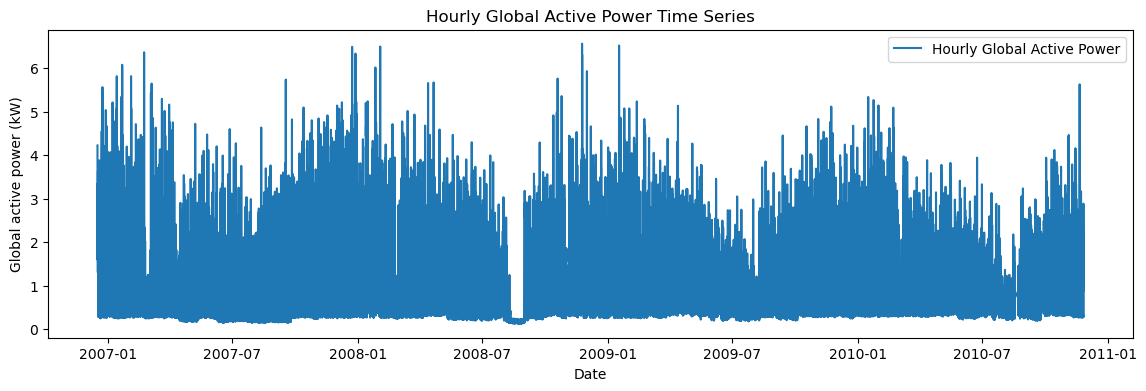

In [364]:
#initial hourly plot
plt.figure(figsize=(14, 4))
plt.plot(tsh, label="Hourly Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Hourly Global Active Power Time Series")
plt.legend()
plt.show()

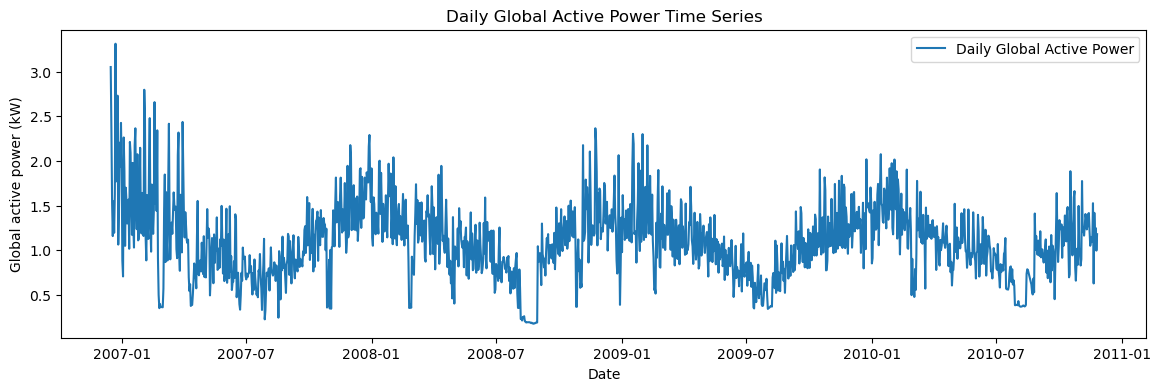

In [365]:
#initial daily plot
plt.figure(figsize=(14, 4))
plt.plot(tsd, label="Daily Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Daily Global Active Power Time Series")
plt.legend()
plt.show()

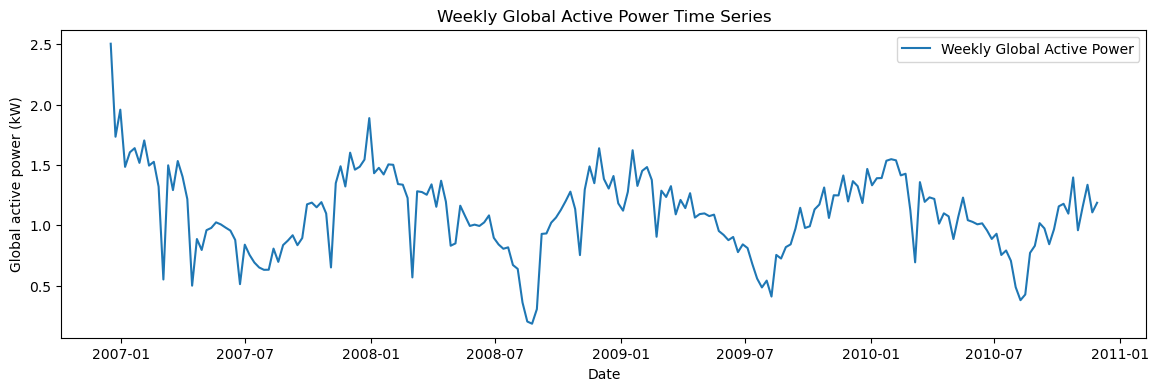

In [366]:
#initial weekly plot
plt.figure(figsize=(14, 4))
plt.plot(tsw, label="Weekly Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Weekly Global Active Power Time Series")
plt.legend()
plt.show()

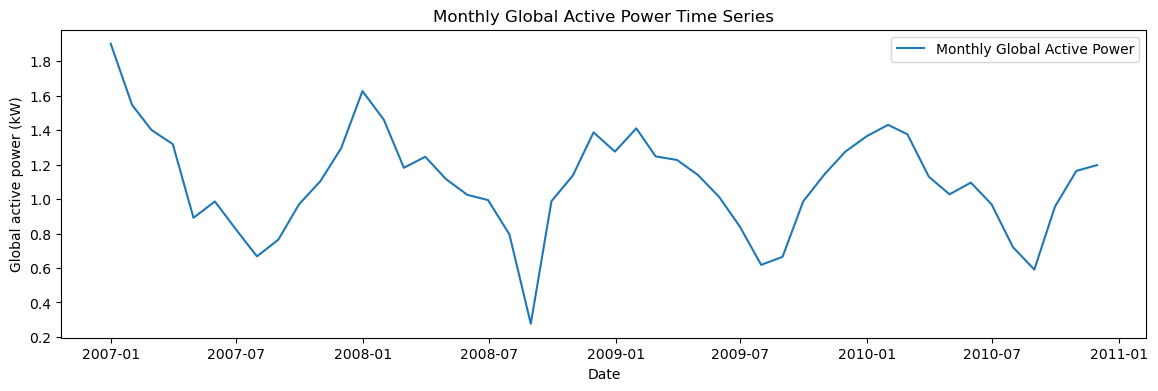

In [367]:
#initial monthly plot
plt.figure(figsize=(14, 4))
plt.plot(tsm, label="Monthly Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Monthly Global Active Power Time Series")
plt.legend()
plt.show()

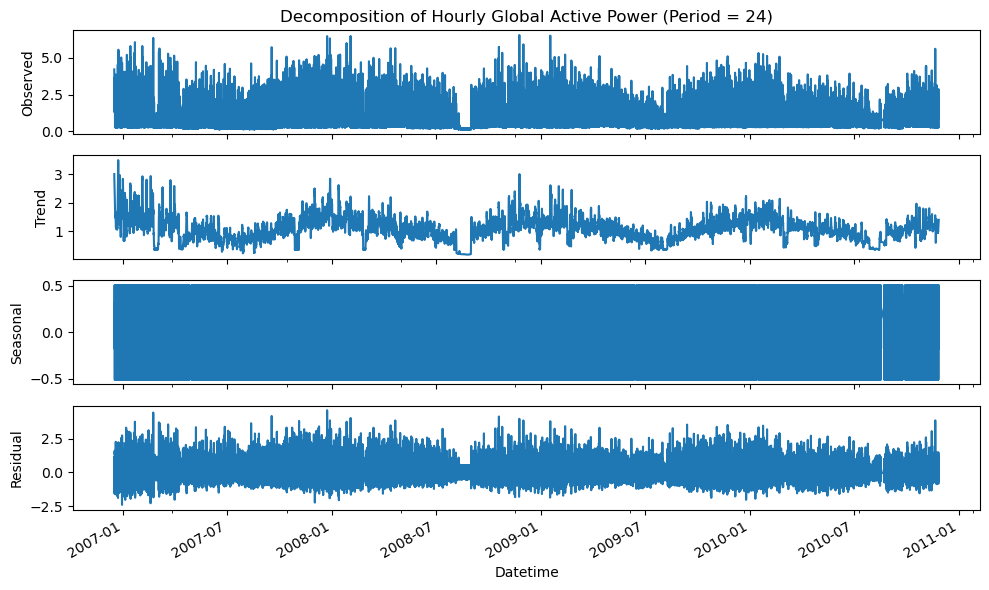

In [368]:
from statsmodels.tsa.seasonal import seasonal_decompose
#hourly compostion
#24 period for daily pattern
decomp_h = seasonal_decompose(tsh, period=24, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 6))

ax[0].set_title('Decomposition of Hourly Global Active Power (Period = 24)')
decomp_h.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp_h.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp_h.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp_h.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

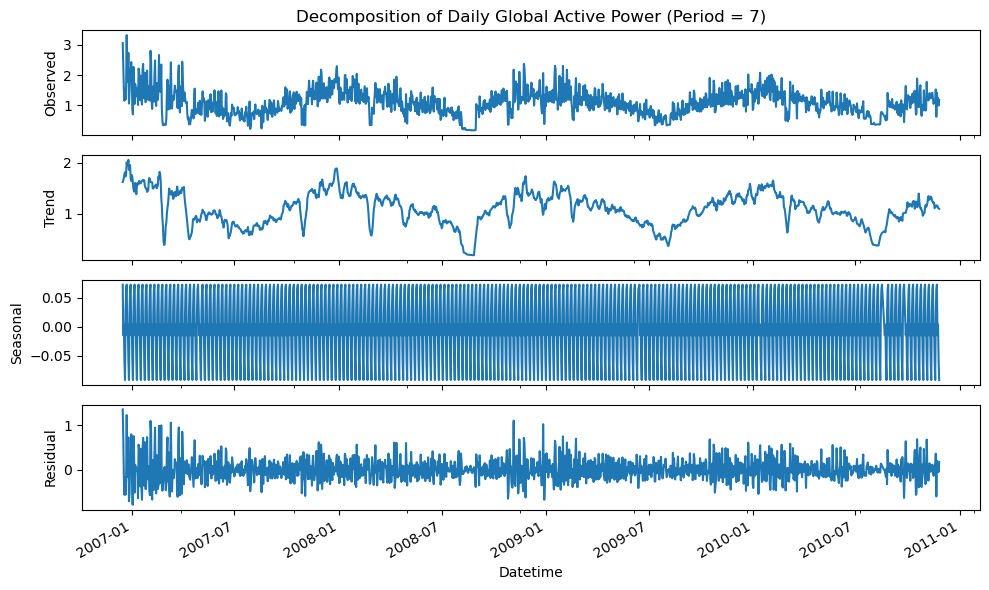

In [369]:
#daily compostion
#7 period for weekly pattern
decomp_d = seasonal_decompose(tsd, period=7, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 6))

ax[0].set_title('Decomposition of Daily Global Active Power (Period = 7)')
decomp_d.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp_d.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp_d.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp_d.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

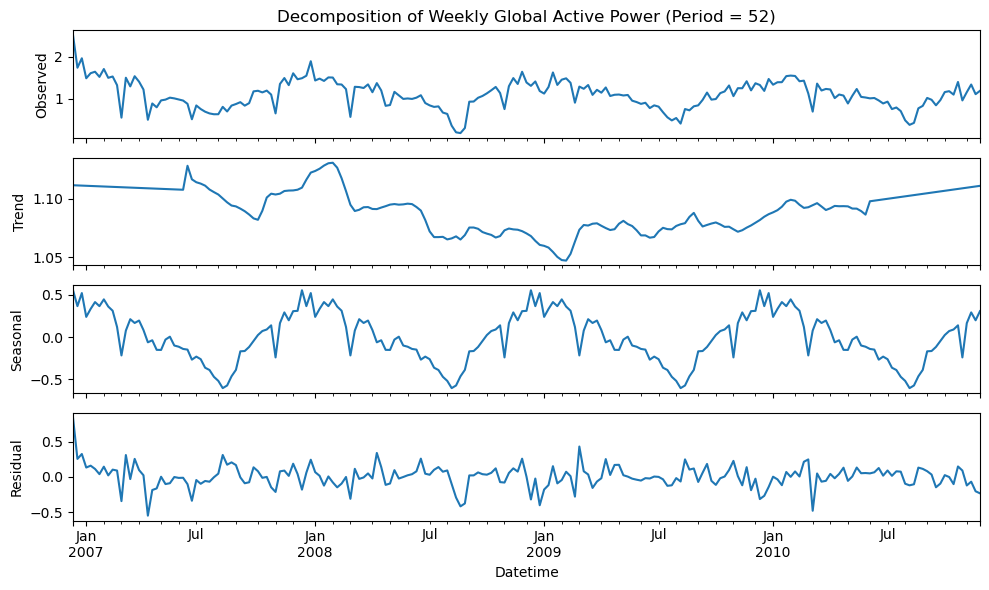

In [372]:
#weekly compostition
#52 weeks for yearly patterns
decomp_w = seasonal_decompose(tsw, period=52, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 6))

ax[0].set_title('Decomposition of Weekly Global Active Power (Period = 52)')
decomp_w.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp_w.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp_w.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp_w.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

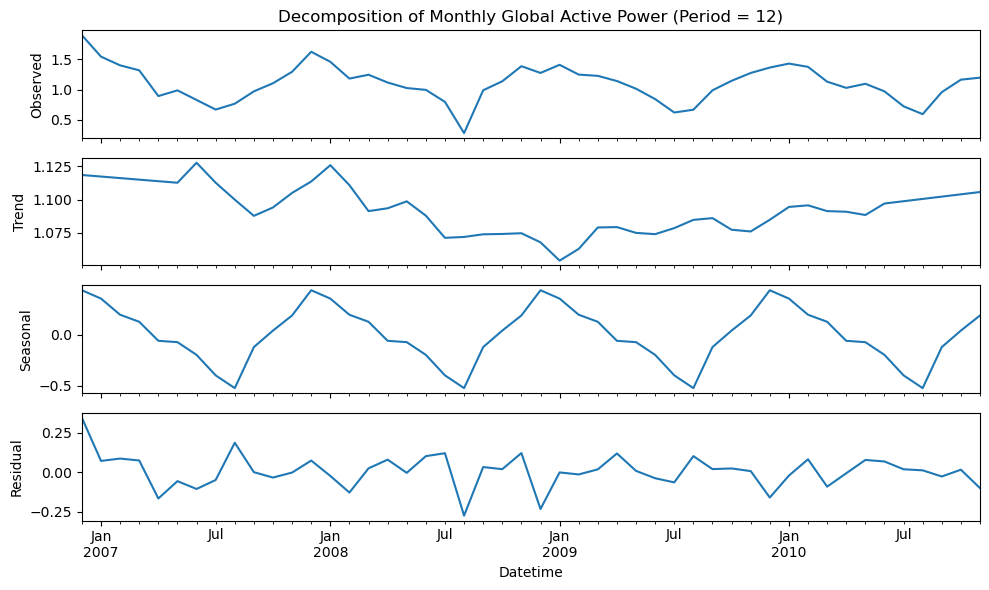

In [375]:
#montlhy composition
#12 periods for yearly
decomp_m = seasonal_decompose(tsm, period=12, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 6))
ax[0].set_title('Decomposition of Monthly Global Active Power (Period = 12)')
decomp_m.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp_m.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp_m.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp_m.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

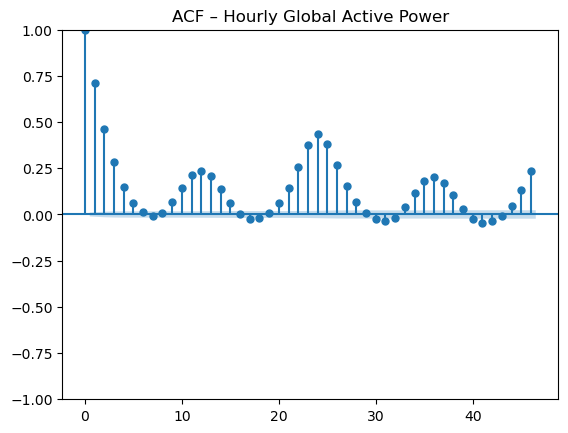

<Figure size 1000x400 with 0 Axes>

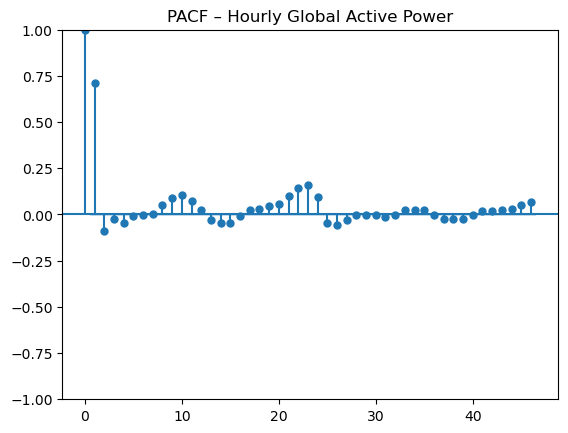

In [378]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#hourly plots to determine lag
series_for_lags_h = tsh

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags_h, title="ACF – Hourly Global Active Power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags_h, title="PACF – Hourly Global Active Power")
plt.show()

<Figure size 1000x400 with 0 Axes>

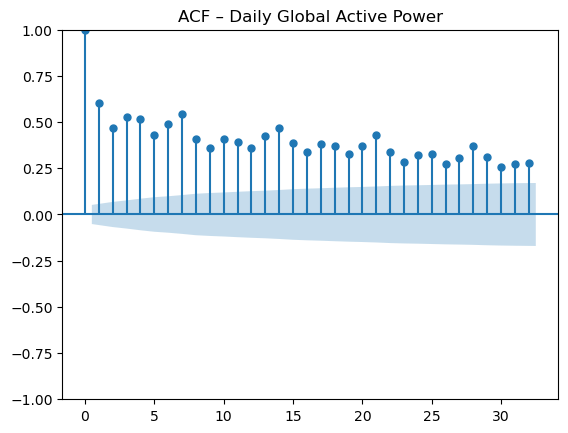

<Figure size 1000x400 with 0 Axes>

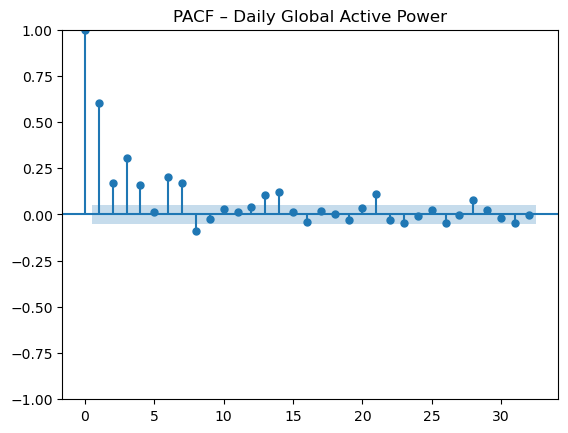

In [379]:
#daily
series_for_lags_d = tsd

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags_d, title="ACF – Daily Global Active Power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags_d, title="PACF – Daily Global Active Power")
plt.show()

<Figure size 1000x400 with 0 Axes>

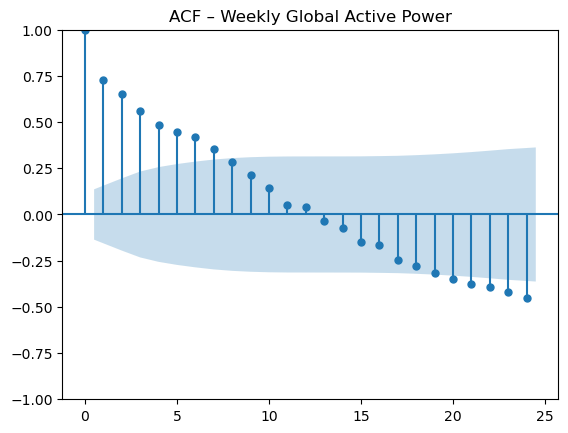

<Figure size 1000x400 with 0 Axes>

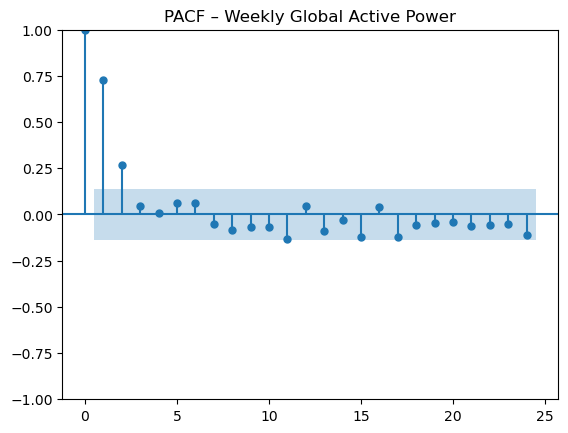

In [380]:
#weekly
series_for_lags_w = tsw

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags_w, title="ACF – Weekly Global Active Power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags_w, title="PACF – Weekly Global Active Power")
plt.show()

<Figure size 1000x400 with 0 Axes>

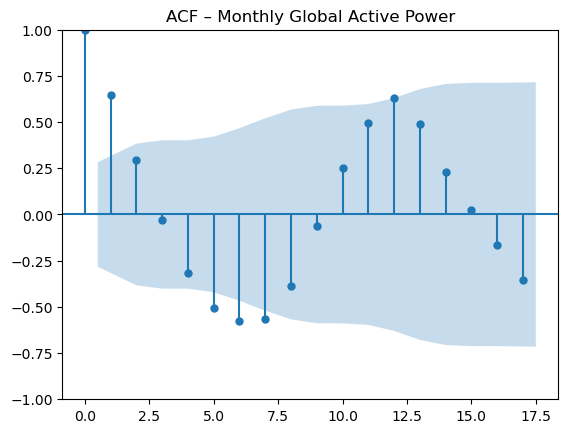

<Figure size 1000x400 with 0 Axes>

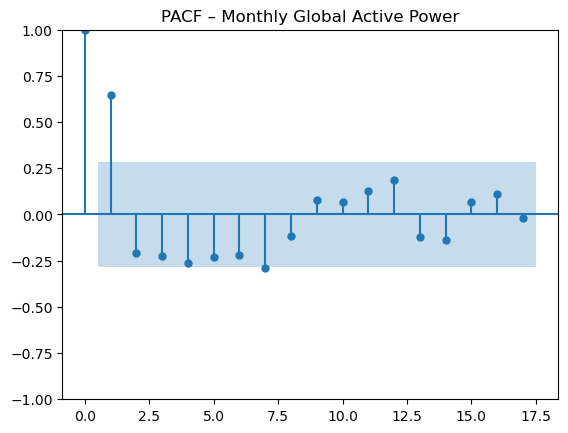

In [382]:
#monthly
series_for_lags_m = tsm

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags_m, title="ACF – Monthly Global Active Power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags_m, title="PACF – Monthly Global Active Power")
plt.show()

In [383]:
#build a df for an AR(p) model
def create_lag_features_from_list(series, lags):
    df = pd.DataFrame({'y': series})
    for lag in lags:
        df[f"lag_{lag}"] = df['y'].shift(lag)
    return df.dropna()

In [385]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#fit an AR(p) model by hand for a given series
def fit_ar_manual(series, lags, label, train_frac=0.8):
    #lagged df
    df_lag = create_lag_features_from_list(series, lags)
    
    #splitchronologically
    train_size = int(len(df_lag) * train_frac)
    train_data = df_lag.iloc[:train_size]
    test_data = df_lag.iloc[train_size:]
    
    y_train = train_data['y'].values
    y_test = test_data['y'].values
    
    X_train = train_data.drop(columns=['y']).values
    X_test = test_data.drop(columns=['y']).values
    

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #add intercept
    X_train_design = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_test_design = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
    
    #closed-form solution
    w, *_ = np.linalg.lstsq(X_train_design, y_train, rcond=None)
    
    #predictions
    y_pred_train = X_train_design @ w
    y_pred_test = X_test_design @ w
    
    #metrics
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    #MAPE with no 0s
    eps = 1e-8
    mape_train = np.mean(np.abs((y_train - y_pred_train) / (y_train + eps))) * 100
    
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test - y_pred_test) / (y_test + eps))) * 100
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"{label}")
    print("Lags:", lags)
    print("Coefficients:", w)
    print("Train - MAE: {:.4f}, RMSE: {:.4f}, MAPE: {:.2f}%, R²: {:.4f}".format(mae_train, rmse_train, mape_train, r2_train))
    print("Test - MAE: {:.4f}, RMSE: {:.4f}, MAPE: {:.2f}%, R²: {:.4f}".format(mae_test, rmse_test, mape_test, r2_test), '\n')
    
    return {"w": w, "lags": lags, "y_train": y_train, "y_test": y_test, "y_pred_train": y_pred_train, "y_pred_test": y_pred_test, 
            "mae_train": mae_train, "rmse_train": rmse_train, "mape_train": mape_train, "r2_train": r2_train, 
            "mae_test": mae_test, "rmse_test": rmse_test, "mape_test": mape_test, "r2_test": r2_test, "scaler": scaler,}

In [388]:
lags_h = [1, 2, 3, 24, 48]
df_lagged_h = create_lag_features_from_list(tsh, lags_h).dropna()
print("Hourly Lagged DataFrame:")
print(df_lagged_h.head())
print("\n")

hourly_lag_sets = [[1], [1, 2], [1, 2, 3], [1, 2, 3, 24], [1, 2, 3, 24, 48],]
results_hourly = {}
for lags in hourly_lag_sets:
    key = f"lags_{lags}"
    results_hourly[key] = fit_ar_manual(tsh, lags, label=f"Hourly AR model with lags={lags}")

Hourly Lagged DataFrame:
                            y     lag_1     lag_2     lag_3    lag_24  \
Datetime                                                                
2006-12-18 17:00:00  2.154900  1.949300  1.784300  1.733033  3.406767   
2006-12-18 18:00:00  2.402533  2.154900  1.949300  1.784300  3.697100   
2006-12-18 19:00:00  2.614500  2.402533  2.154900  1.949300  2.908400   
2006-12-18 20:00:00  3.050567  2.614500  2.402533  2.154900  3.361500   
2006-12-18 21:00:00  2.169733  3.050567  2.614500  2.402533  3.040767   

                       lag_48  
Datetime                       
2006-12-18 17:00:00  4.222889  
2006-12-18 18:00:00  3.632200  
2006-12-18 19:00:00  3.400233  
2006-12-18 20:00:00  3.268567  
2006-12-18 21:00:00  3.056467  


Hourly AR model with lags=[1]
Lags: [1]
Coefficients: [1.11045726 0.66980971]
Train - MAE: 0.4625, RMSE: 0.6466, MAPE: 66.23%, R²: 0.5176
Test - MAE: 0.4033, RMSE: 0.5531, MAPE: 56.74%, R²: 0.4471 

Hourly AR model with lags=[1, 2]
Lags:

In [389]:
lags_d = [1, 2, 3, 4, 7]
df_lagged_d = create_lag_features_from_list(tsd, lags_d).dropna()
print("Daily Lagged DataFrame:")
print(df_lagged_d.head())
print("\n")

daily_lag_sets = [[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 7],]
results_daily = {}
for lags in daily_lag_sets:
    key = f"lags_{lags}"
    results_daily[key] = fit_ar_manual(tsd, lags, label=f"Daily AR model with lags={lags}")

Daily Lagged DataFrame:
                   y     lag_1     lag_2     lag_3     lag_4     lag_7
Datetime                                                              
2006-12-23  3.314851  1.625929  1.193758  1.545658  1.157079  3.053475
2006-12-24  1.770842  3.314851  1.625929  1.193758  1.545658  2.354486
2006-12-25  1.904944  1.770842  3.314851  1.625929  1.193758  1.530435
2006-12-26  2.732021  1.904944  1.770842  3.314851  1.625929  1.157079
2006-12-27  1.061639  2.732021  1.904944  1.770842  3.314851  1.545658


Daily AR model with lags=[1]
Lags: [1]
Coefficients: [1.11084413 0.26627667]
Train - MAE: 0.2663, RMSE: 0.3464, MAPE: 30.37%, R²: 0.3715
Test - MAE: 0.2043, RMSE: 0.2650, MAPE: 24.23%, R²: 0.2895 

Daily AR model with lags=[1, 2]
Lags: [1, 2]
Coefficients: [1.10975703 0.22250689 0.06785682]
Train - MAE: 0.2608, RMSE: 0.3423, MAPE: 29.24%, R²: 0.3823
Test - MAE: 0.1938, RMSE: 0.2562, MAPE: 22.74%, R²: 0.3361 

Daily AR model with lags=[1, 2, 3]
Lags: [1, 2, 3]
Coefficients:

In [390]:
lags_w = [1, 2, 3]
df_lagged_w = create_lag_features_from_list(tsw, lags_w).dropna()
print("Weekly Lagged DataFrame:")
print(df_lagged_w.head())
print("\n")

weekly_lag_sets = [[1], [1, 2], [1, 2, 3],]
results_weekly = {}
for lags in weekly_lag_sets:
    key = f"lags_{lags}"
    results_weekly[key] = fit_ar_manual(tsw, lags, label=f"Weekly AR model with lags={lags}")

Weekly Lagged DataFrame:
                   y     lag_1     lag_2     lag_3
Datetime                                          
2007-01-07  1.484233  1.958376  1.734186  2.505248
2007-01-14  1.604954  1.484233  1.958376  1.734186
2007-01-21  1.639451  1.604954  1.484233  1.958376
2007-01-28  1.517470  1.639451  1.604954  1.484233
2007-02-04  1.703608  1.517470  1.639451  1.604954


Weekly AR model with lags=[1]
Lags: [1]
Coefficients: [1.10912346 0.2572138 ]
Train - MAE: 0.1567, RMSE: 0.2160, MAPE: 18.20%, R²: 0.5865
Test - MAE: 0.1412, RMSE: 0.1832, MAPE: 16.40%, R²: 0.4401 

Weekly AR model with lags=[1, 2]
Lags: [1, 2]
Coefficients: [1.10717016 0.18337453 0.09443786]
Train - MAE: 0.1444, RMSE: 0.2047, MAPE: 17.11%, R²: 0.6223
Test - MAE: 0.1383, RMSE: 0.1831, MAPE: 16.34%, R²: 0.4159 

Weekly AR model with lags=[1, 2, 3]
Lags: [1, 2, 3]
Coefficients: [1.10194804 0.18018444 0.07609141 0.01552265]
Train - MAE: 0.1447, RMSE: 0.2048, MAPE: 17.29%, R²: 0.6086
Test - MAE: 0.1381, RMSE: 0.1

In [393]:
lags_m = [1, 2, 12]
df_lagged_m = create_lag_features_from_list(tsm, lags_m).dropna()
print("Monthly Lagged DataFrame:")
print(df_lagged_m.head())
print("\n")

monthly_lag_sets = [[1], [1, 2], [1, 2, 12],]
results_monthly = {}
for lags in monthly_lag_sets:
    key = f"lags_{lags}"
    results_monthly[key] = fit_ar_manual(tsm, lags, label=f"Monthly AR model with lags={lags}")

Monthly Lagged DataFrame:
                   y     lag_1     lag_2    lag_12
Datetime                                          
2007-12-31  1.626474  1.294473  1.103911  1.901295
2008-01-31  1.459920  1.626474  1.294473  1.546034
2008-02-29  1.181384  1.459920  1.626474  1.401084
2008-03-31  1.245337  1.181384  1.459920  1.318627
2008-04-30  1.115972  1.245337  1.181384  0.891189


Monthly AR model with lags=[1]
Lags: [1]
Coefficients: [1.09829365 0.201621  ]
Train - MAE: 0.1551, RMSE: 0.2031, MAPE: 19.72%, R²: 0.4964
Test - MAE: 0.1429, RMSE: 0.1626, MAPE: 16.52%, R²: 0.4453 

Monthly AR model with lags=[1, 2]
Lags: [1, 2]
Coefficients: [ 1.08585642  0.2369834  -0.06692645]
Train - MAE: 0.1523, RMSE: 0.1999, MAPE: 19.32%, R²: 0.4909
Test - MAE: 0.1208, RMSE: 0.1450, MAPE: 14.24%, R²: 0.5587 

Monthly AR model with lags=[1, 2, 12]
Lags: [1, 2, 12]
Coefficients: [ 1.12049751  0.08137249 -0.03758004  0.19864065]
Train - MAE: 0.1016, RMSE: 0.1462, MAPE: 14.96%, R²: 0.7367
Test - MAE: 0.05

In [402]:
#plot real vs predicted results
def plot_results_for_frequency(results_dict, freq_label):
    for key, res in results_dict.items():
        lags_str = key[5:]
        
        y_test = res["y_test"]
        y_pred = res["y_pred_test"]
        
        plt.figure(figsize=(14, 5))
        plt.plot(y_test, label="Actual", linewidth=2)
        plt.plot(y_pred, label=f"Predicted (lags={lags_str})", linewidth=2)
        plt.title(f"{freq_label} Model – Actual vs Predicted (lags={lags_str})")
        plt.xlabel("Test Index")
        plt.ylabel("Global Active Power")
        plt.legend()
        plt.tight_layout()
        plt.show()

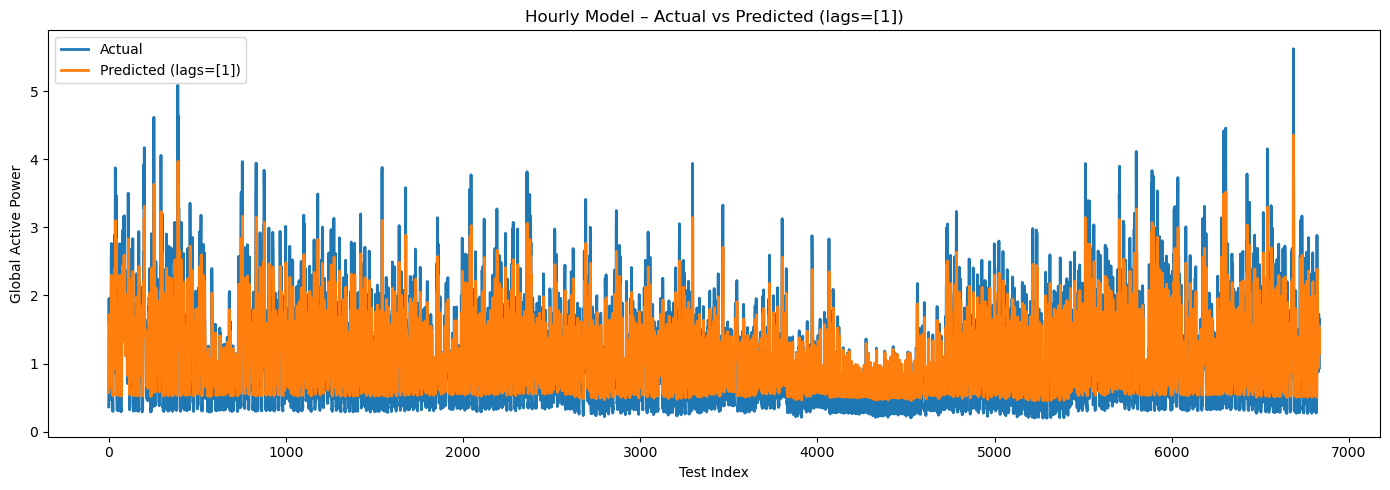

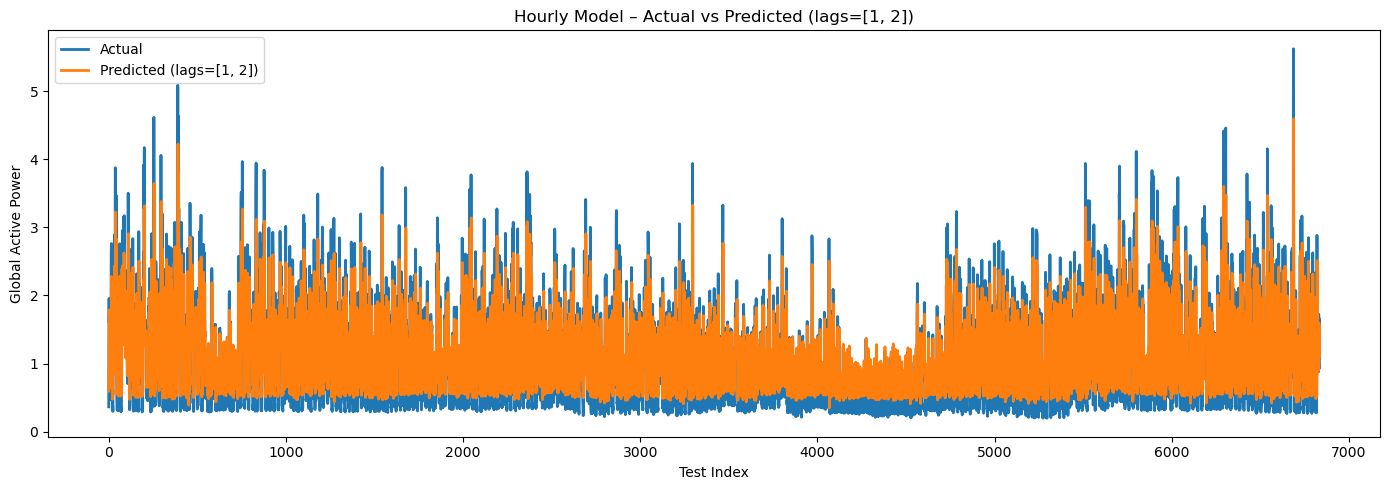

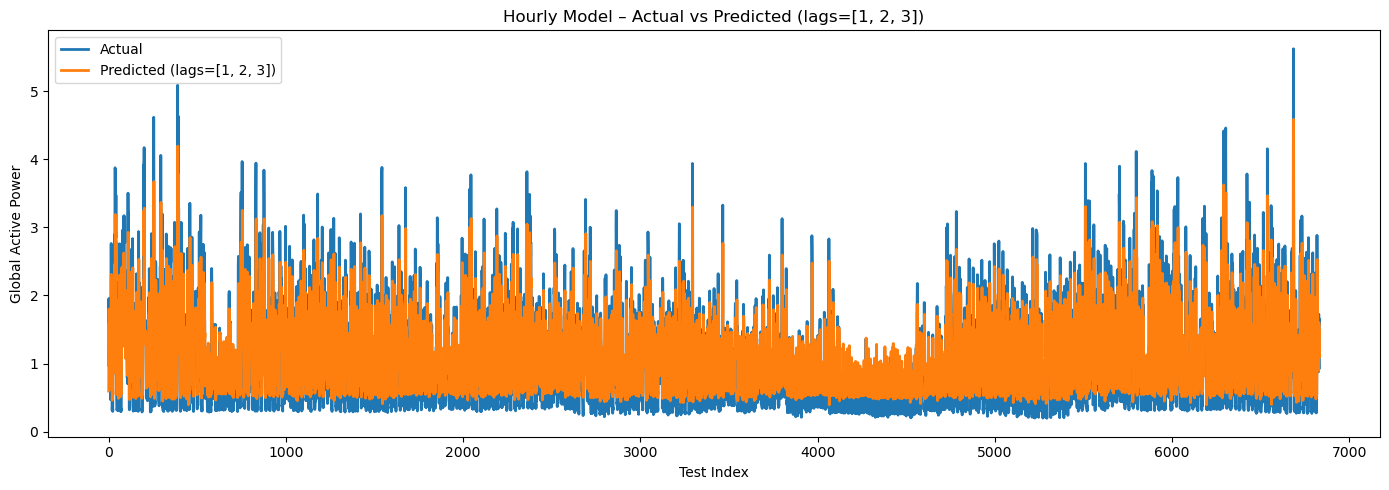

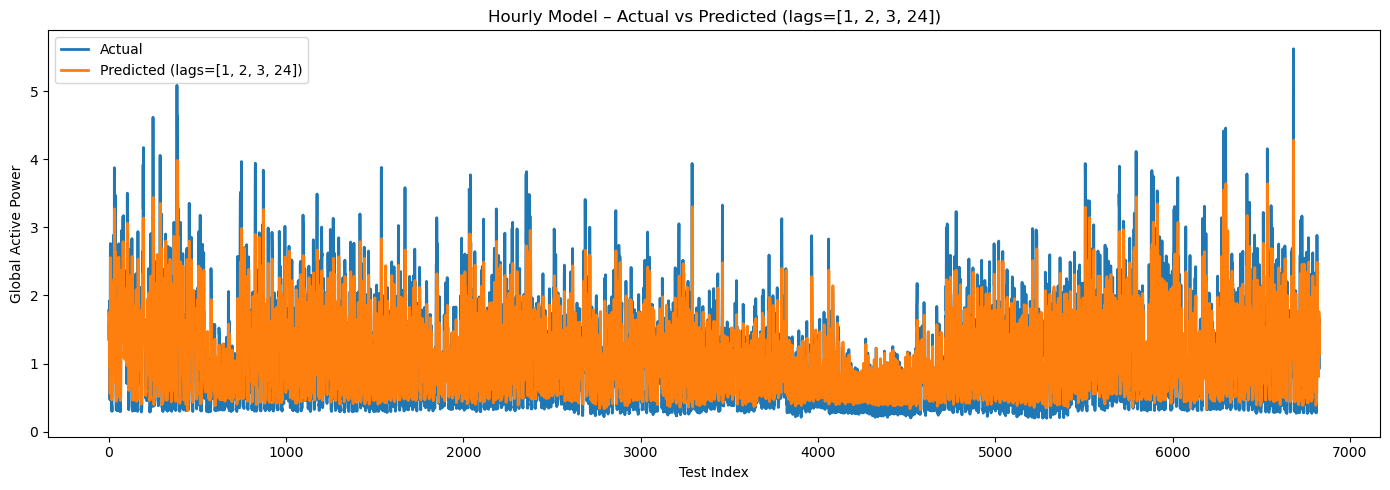

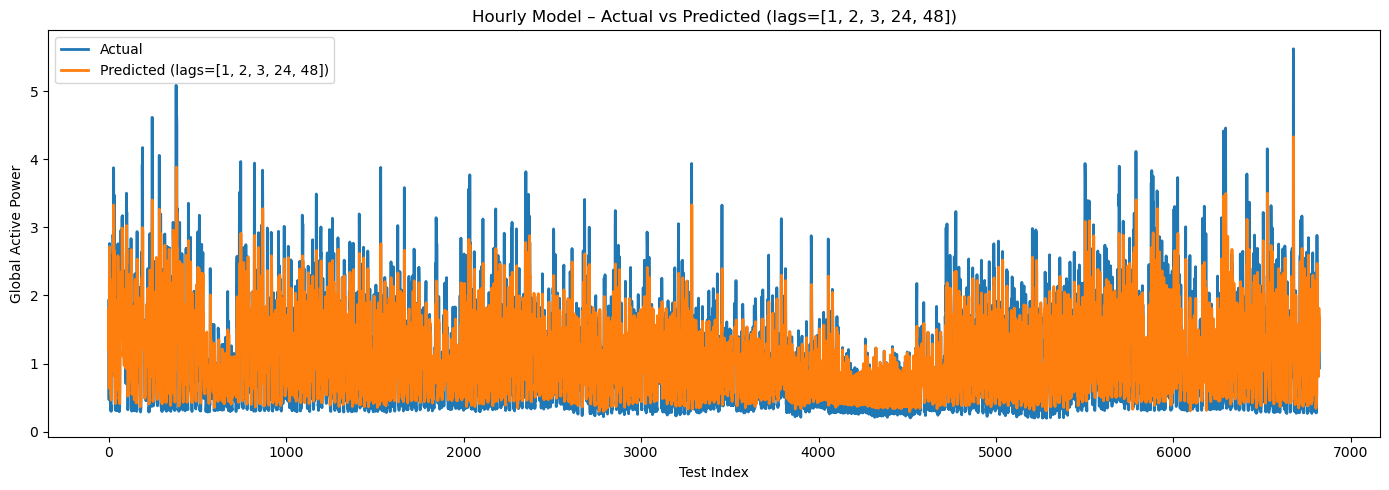

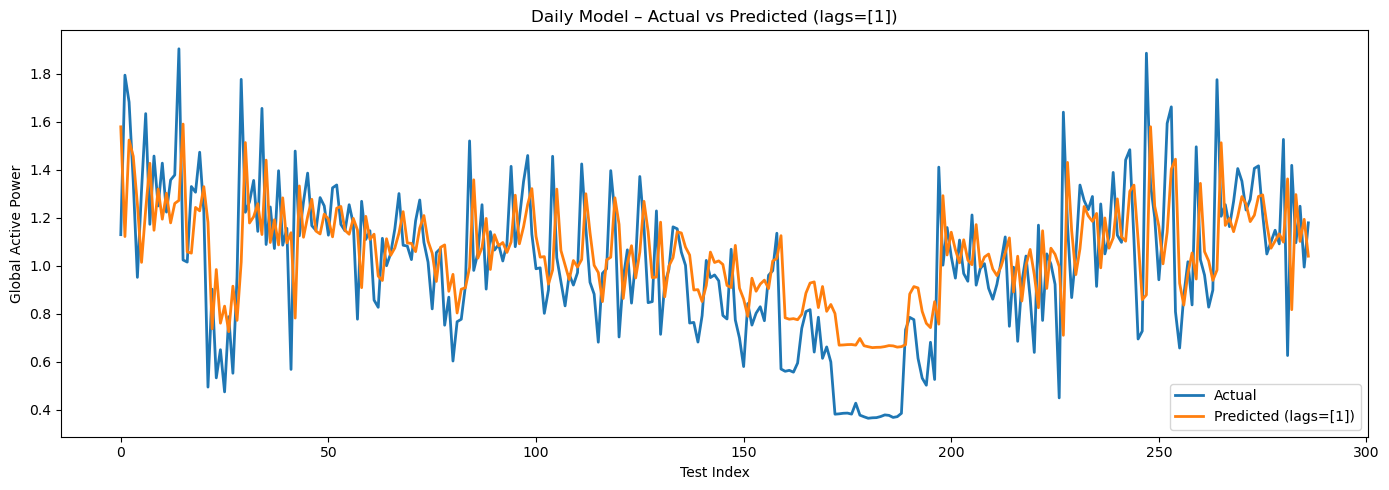

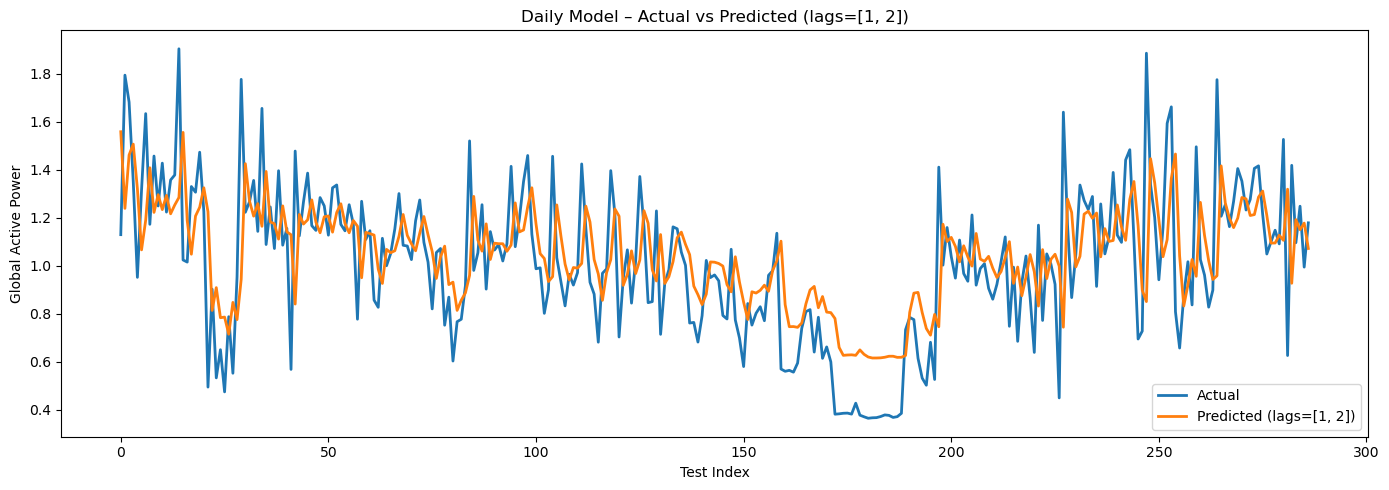

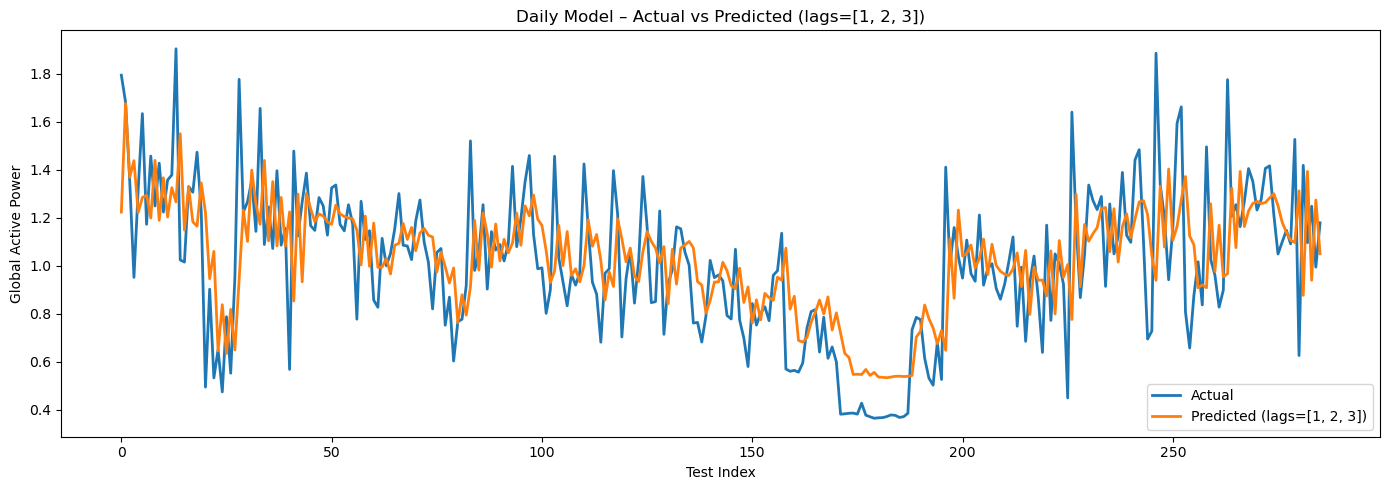

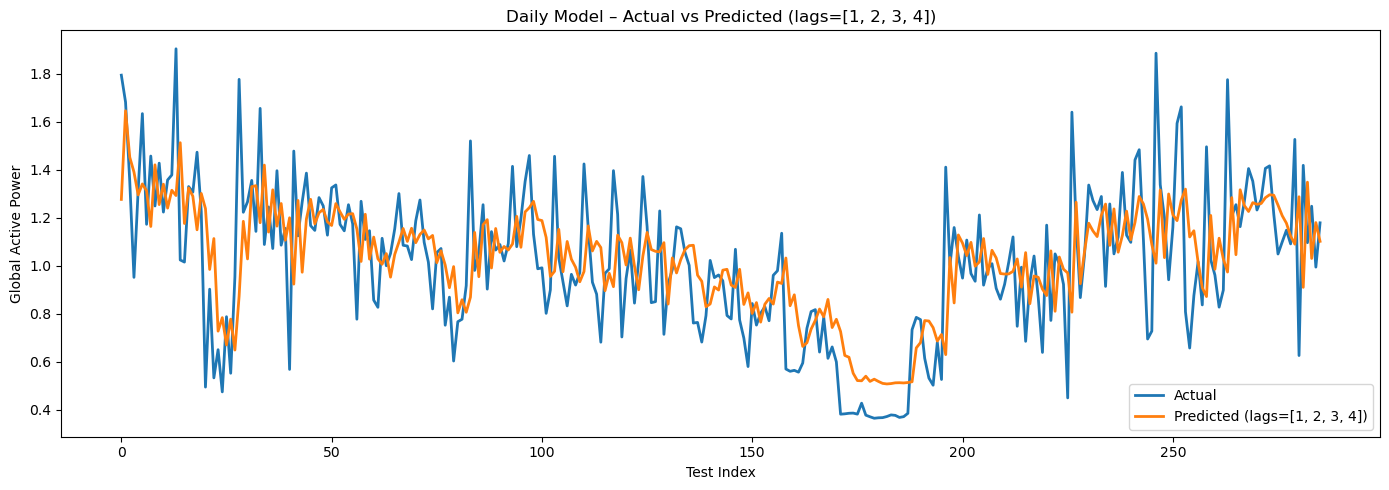

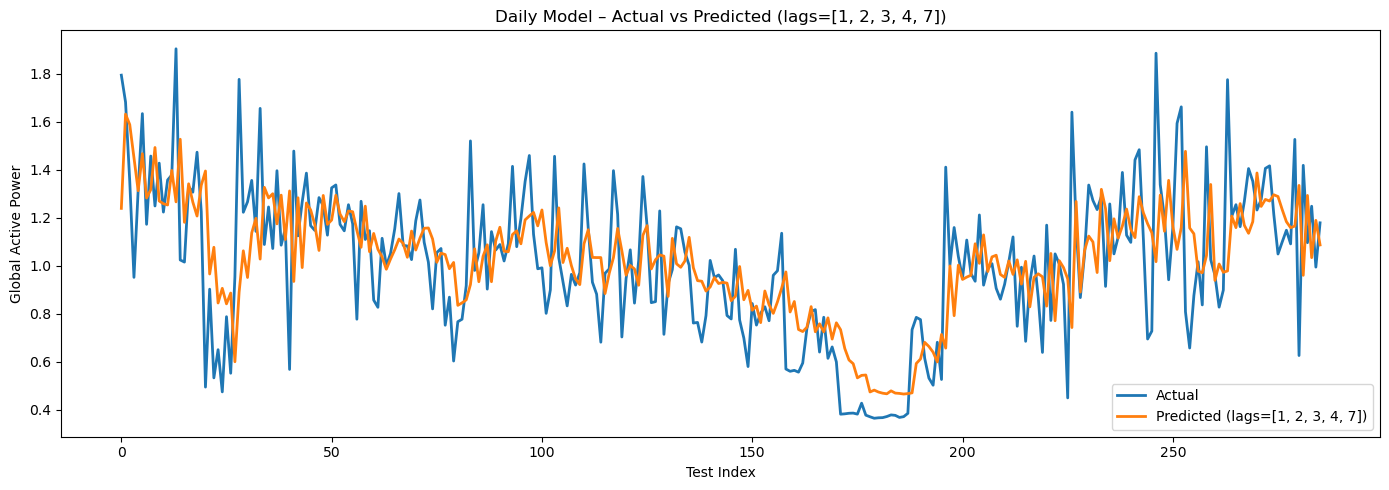

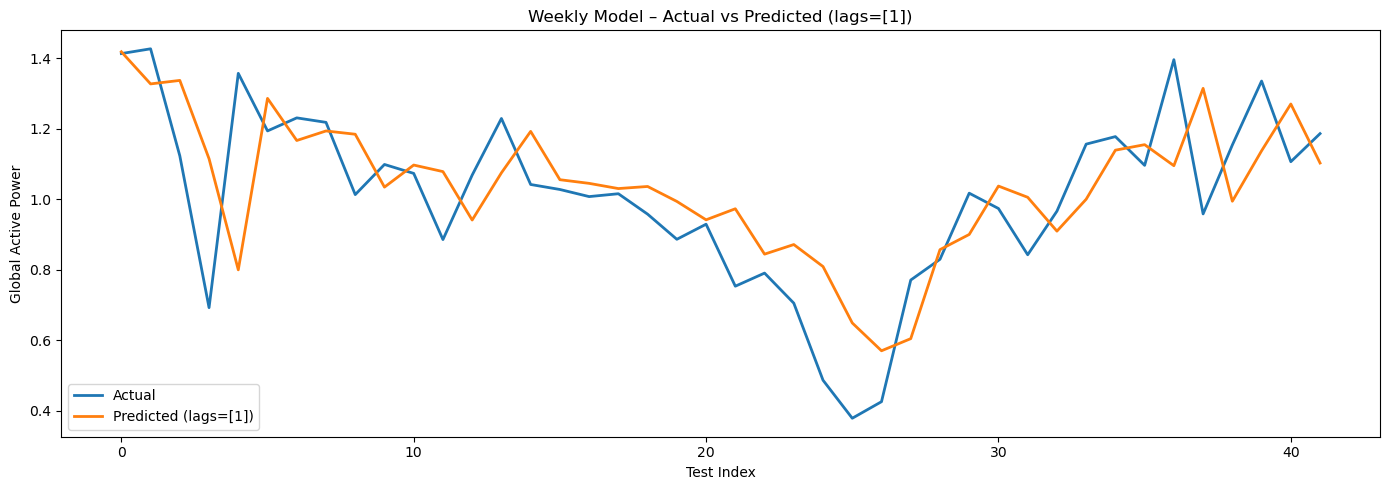

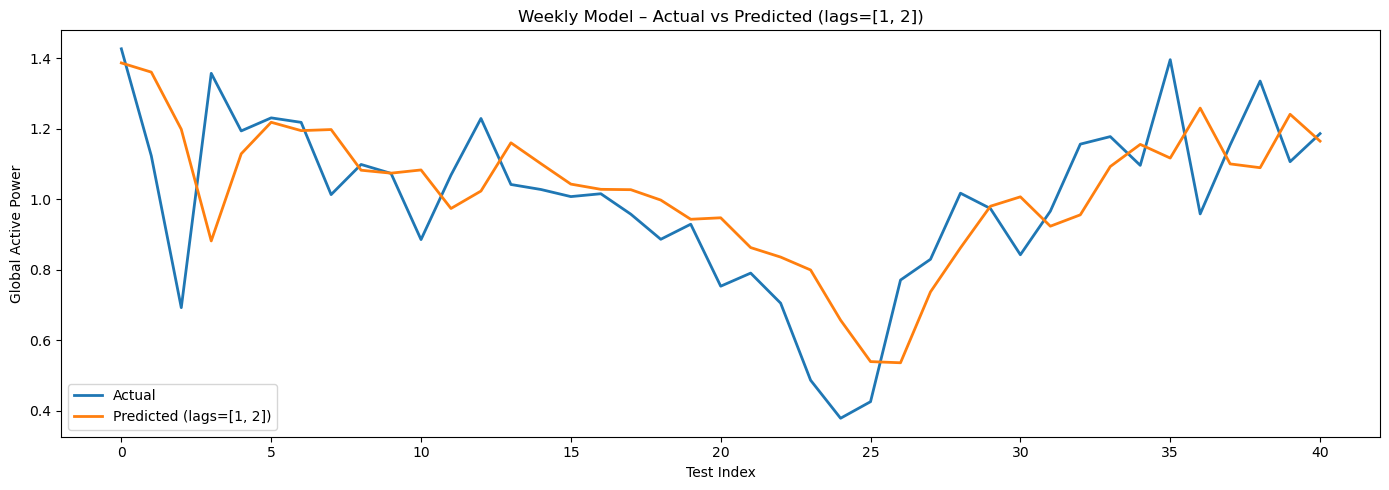

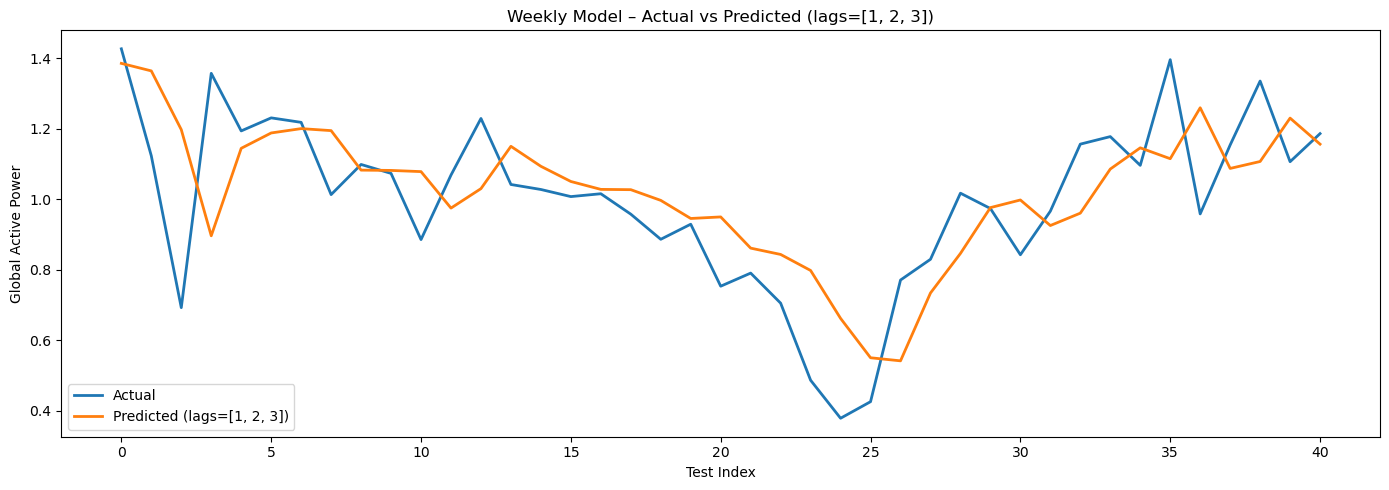

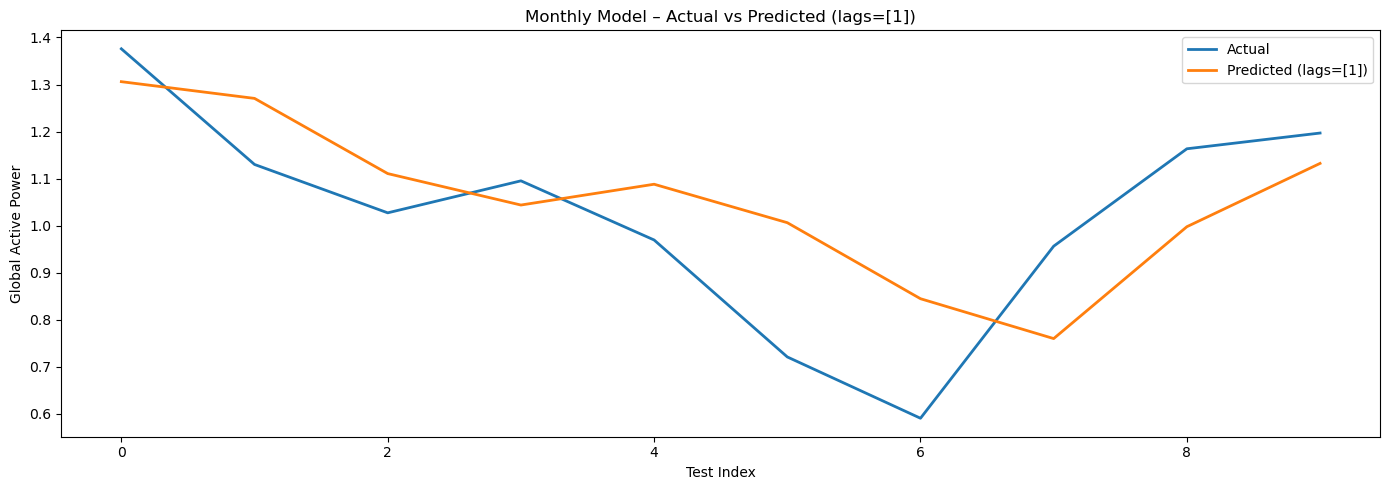

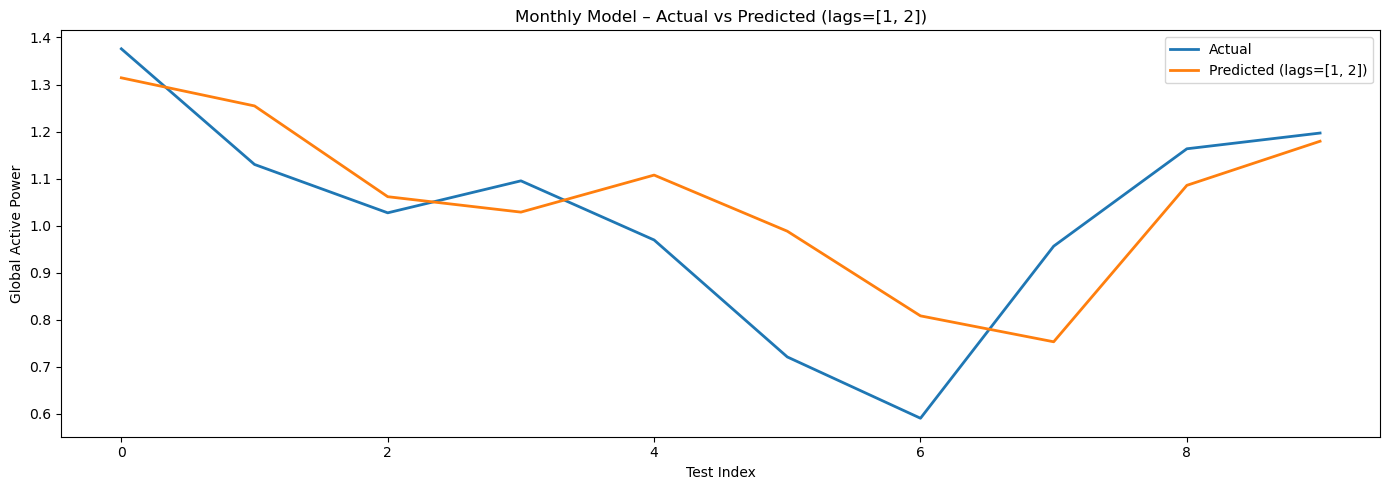

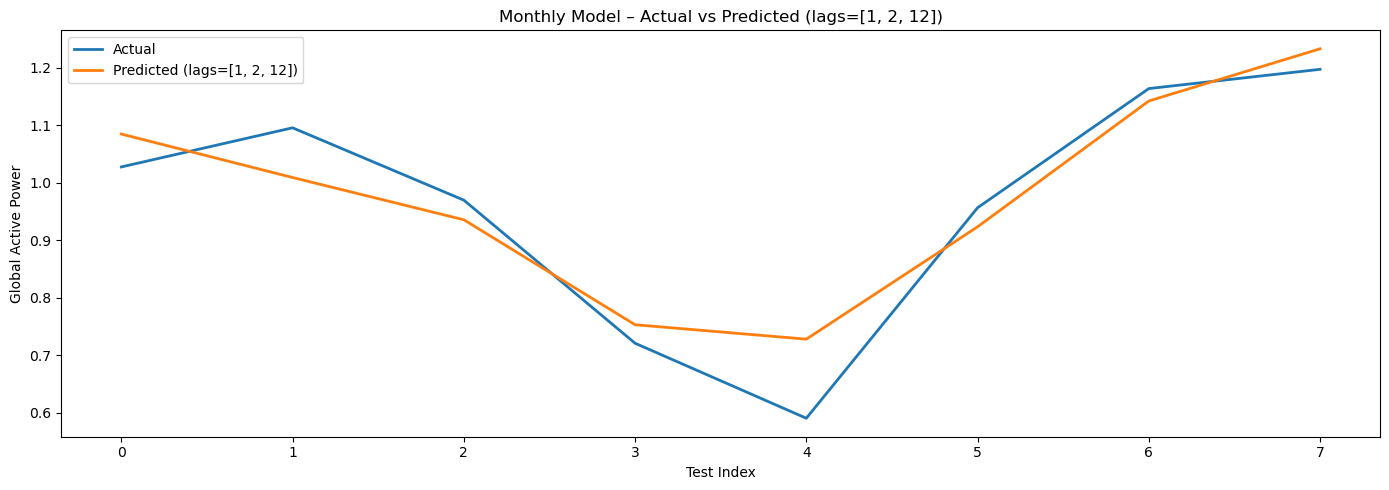

In [404]:
#hourly: one plot per lag configuration
plot_results_for_frequency(results_hourly, "Hourly")

#daily: one plot per lag configuration
plot_results_for_frequency(results_daily, "Daily")

#daily: one plot per lag configuration
plot_results_for_frequency(results_weekly, "Weekly")

#daily: one plot per lag configuration
plot_results_for_frequency(results_monthly, "Monthly")

In [405]:
#future forecasting function
def forecast_future(series, result, n_steps=50):
    lags = result["lags"]
    scaler = result["scaler"]
    w = result["w"]
    
    #copy to keep original
    current_series = series.copy().astype(float)
    freq = current_series.index[1] - current_series.index[0]
    future_index = []
    future_values = []
    
    for _ in range(n_steps):
        #lagged values from training
        lagged_vals = [current_series.iloc[-lag] for lag in lags]
        X_raw = np.array(lagged_vals).reshape(1, -1)
        #scale
        X_scaled = scaler.transform(X_raw)
        #intercept
        X_design = np.hstack([np.ones((1, 1)), X_scaled])
        # prediction
        y_hat = (X_design @ w).item()   # safe scalar
        #next timestamp
        next_timestamp = current_series.index[-1] + freq
        #append prediction to series to use as lag
        current_series.loc[next_timestamp] = y_hat
        future_index.append(next_timestamp)
        future_values.append(y_hat)
    
    return pd.Series(future_values, index=future_index, name="forecast")

In [408]:
#plotting function for future forecasting
def plot_test_and_future(series, result, freq_label, n_future_steps=50, train_frac=0.8):
    lags = result["lags"]
    
    #split lag df to plot half against test and half into future
    df_lag = create_lag_features_from_list(series, lags)
    train_size = int(len(df_lag) * train_frac)
    test_data = df_lag.iloc[train_size:]
    test_index = test_data.index
    
    y_test = result["y_test"]
    y_pred_test = result["y_pred_test"]
    
    #last half of the test data for plotting
    n_test = len(y_test)
    n_half = max(1, n_test // 2)
    test_index_half = test_index[-n_half:]
    y_test_half = y_test[-n_half:]
    y_pred_half = y_pred_test[-n_half:]
    
    #forecast
    future_series = forecast_ar_manual_future(series, result, n_steps=n_future_steps)
    fig, ax = plt.subplots(figsize=(14, 5))
    #test data
    ax.plot(test_index_half, y_test_half, label="Actual (Test)", linewidth=2)
    ax.plot(test_index_half, y_pred_half, label="Predicted (Test)", linewidth=2)
    #future
    ax.plot(future_series.index, future_series.values, label="Forecast (Future)", linewidth=2, linestyle="--")
    #line between test and forecast
    ax.axvline(test_index_half[-1], linestyle=":", linewidth=1)
    ax.set_title(f"{freq_label} Model – Last Half of Test vs Future Forecast")
    ax.set_xlabel("Time")
    ax.set_ylabel("Global Active Power")
    ax.legend()
    fig.tight_layout()
    return fig, ax

/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w)
/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w)
/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w

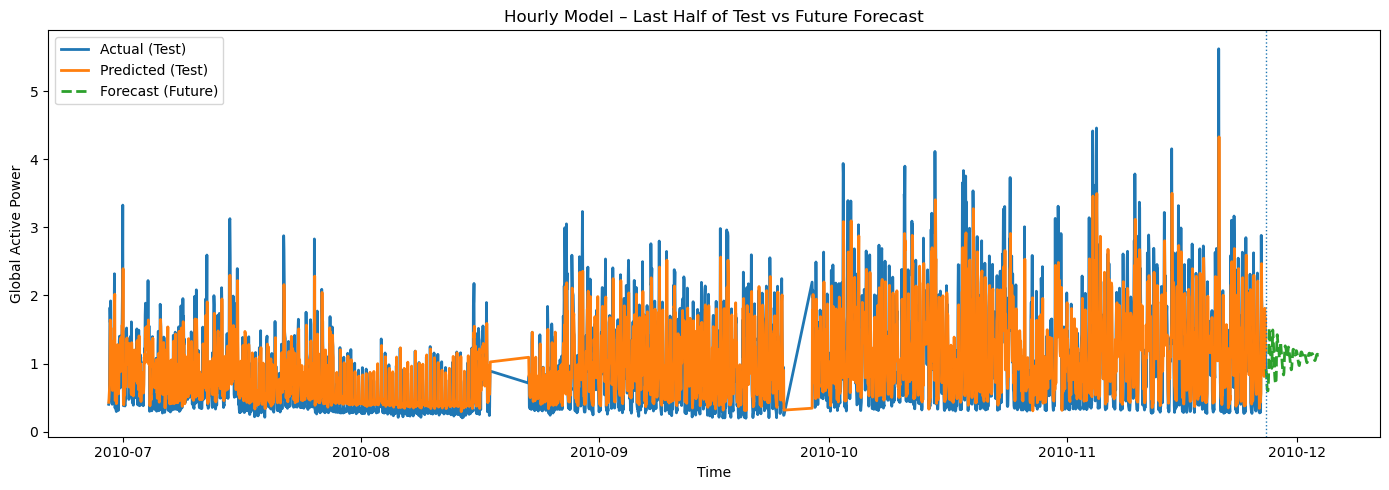

In [410]:
#hourly: lags [1, 2, 3, 24, 48]
fig, ax = plot_test_and_future(series=tsh, result=results_hourly["lags_[1, 2, 3, 24, 48]"], freq_label="Hourly", n_future_steps=168)
#fig.savefig("plots/hourly_future_forecast.png", dpi=300, bbox_inches="tight")

/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w)
/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w)
/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w

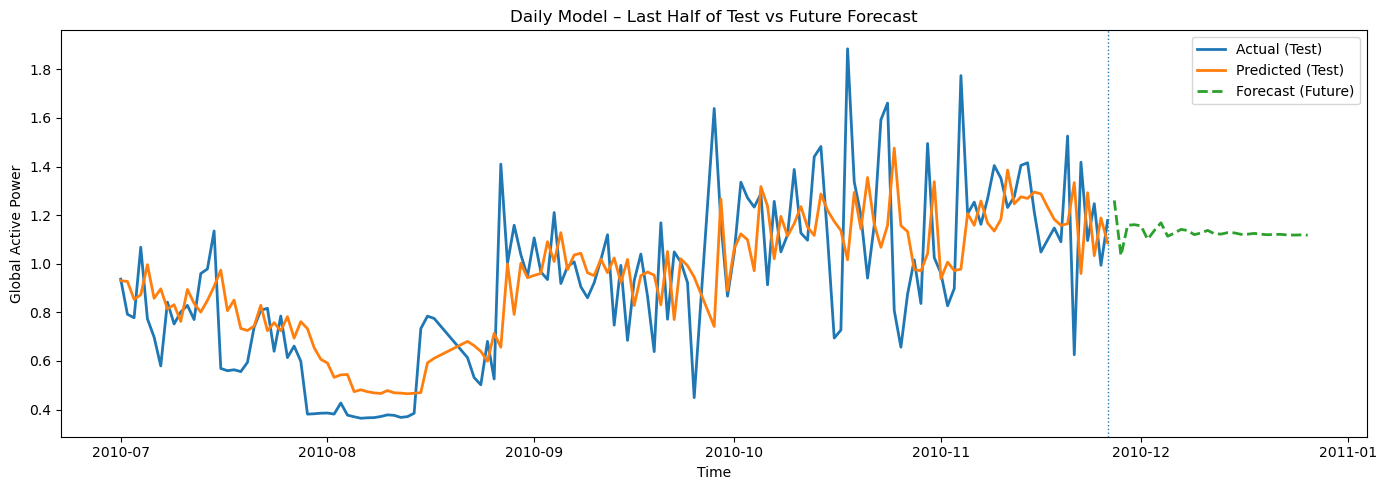

In [412]:
#daily: lags [1, 2, 3, 4, 7]
fig, ax = plot_test_and_future(series=tsd, result=results_daily["lags_[1, 2, 3, 4, 7]"], freq_label="Daily", n_future_steps=30)
#fig.savefig("plots/daily_future_forecast.png", dpi=300, bbox_inches="tight")

/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w)
/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w)
/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w

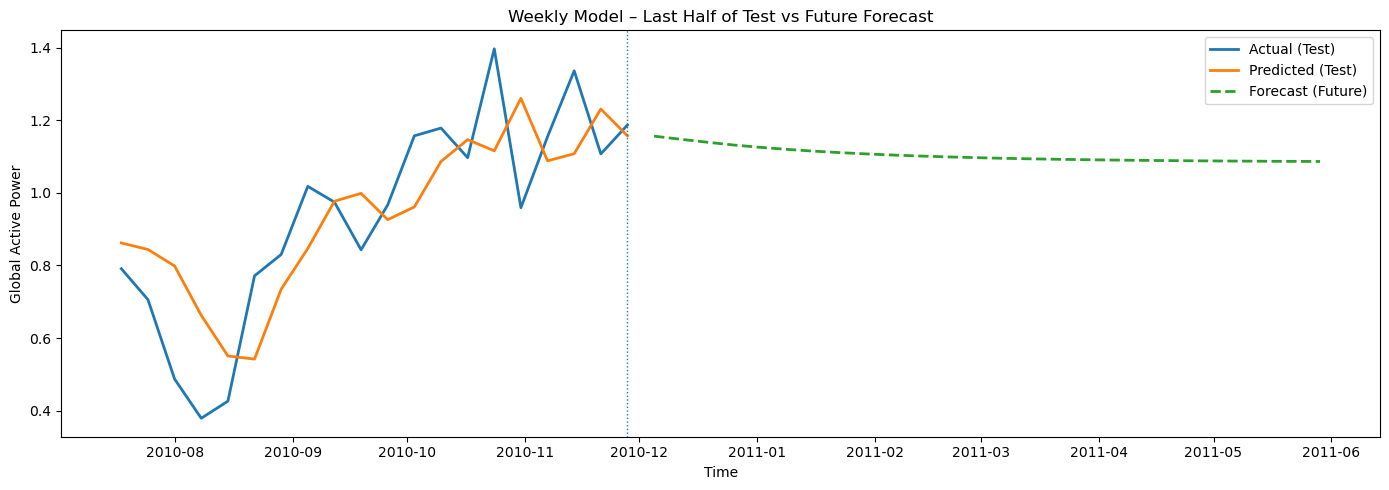

In [414]:
#weekly: lags [1, 2, 3]
fig, ax = plot_test_and_future(series=tsw, result=results_weekly["lags_[1, 2, 3]"], freq_label="Weekly", n_future_steps=26)
#fig.savefig("plots/weekly_future_forecast.png", dpi=300, bbox_inches="tight")

/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w)
/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w)
/var/folders/yf/df_nzf8921jd3xgbyp05zqdh0000gn/T/ipykernel_22158/2388239705.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat = float(X_design @ w

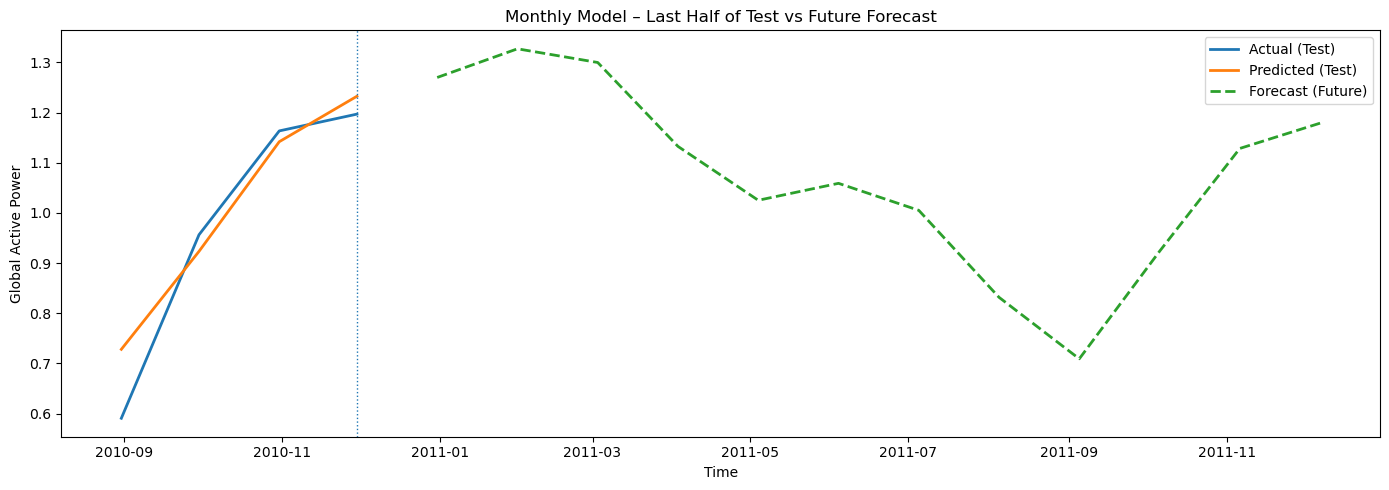

In [416]:
#monthly: lags [1, 2, 12]
fig, ax = plot_test_and_future(series=tsm, result=results_monthly["lags_[1, 2, 12]"], freq_label="Monthly", n_future_steps=12)
fig.savefig("plots/monthly_future_forecast.png", dpi=300, bbox_inches="tight")